In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score


# read data 
data = pd.read_csv('data_cleaned.csv')

data

,PriceRange,ReleaseYear,Camera,AvailableColors,Ram_GB,NetworkSupport,BluetoothVersion,Rom_GB,BatteryCapacity,VideoRes,...,USB_Version,TypeC,NFC,Display,Protection,Chipset,Processor,GPU,Fingerprint,FaceLock
0,4.0,2022.0,32.0,4.0,8.0,4.0,5.0,128.0,4500.0,2160.0,...,3.2,1,1,Dynamic AMOLED 2X Touchscreen,1,Exynos 2100 (5 nm),"Octa core, up to 2.9 GHz",Mali-G78 MP14,1,1
1,1.0,2021.0,5.0,2.0,4.0,3.0,5.0,64.0,5000.0,0.0,...,2.0,1,0,PLS IPS Touchscreen,0,MediaTek Helio P35 (12nm),"Octa core, up to 2.35 GHz",PowerVR GE8320,1,1
2,3.0,2021.0,32.0,4.0,8.0,4.0,5.0,128.0,4500.0,2160.0,...,2.0,1,0,Super AMOLED Touchscreen,1,Qualcomm Snapdragon 778G 5G (6 nm),"Octa core, up to 2.4 GHz",Adreno 642L,1,1
3,1.0,2021.0,13.0,2.0,6.0,3.0,5.0,128.0,6000.0,1080.0,...,2.0,1,0,Super AMOLED Touchscreen,0,Mediatek Helio G80 (12 nm),"Octa core, up to 2.0 GHz",Mali-G52 MC2,1,1
4,4.0,2021.0,4.0,3.0,12.0,4.0,5.2,256.0,4400.0,2160.0,...,3.2,1,1,Foldable Dynamic AMOLED 2X Touchscreen,1,Qualcomm Snapdragon 888 5G (5 nm),"Octa core, up to 2.84 GHz",Adreno 660,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,1.0,2018.0,8.0,3.0,3.0,3.0,4.2,16.0,2990.0,720.0,...,2.0,0,0,IPS LCD Touchscreen,1,Mediatek MT6750 (28 nm),"Octa-core, up to 1.5 GHz",Mali-T860 MP2,0,1
490,2.0,2017.0,13.0,4.0,6.0,3.0,5.0,64.0,3090.0,2160.0,...,3.1,1,1,IPS LCD Touchscreen,1,Qualcomm Snapdragon 835 (10 nm),"Octa-core, up to 2.5 GHz",Adreno 540,1,1
491,0.0,2017.0,8.0,4.0,2.0,3.0,4.0,16.0,2630.0,720.0,...,2.0,0,0,IPS LCD Touchscreen,1,Mediatek MT6737 (28 nm),"Quad-core, 1.4 GHz",Mali-T720 MP1,0,0
492,0.0,2017.0,5.0,3.0,1.0,3.0,4.1,8.0,4100.0,720.0,...,2.0,0,0,LTPS IPS LCD Touchscreen,1,Qualcomm Snapdragon 212 (28 nm),"Quad-core, 1.3 GHz",Adreno 304,0,0


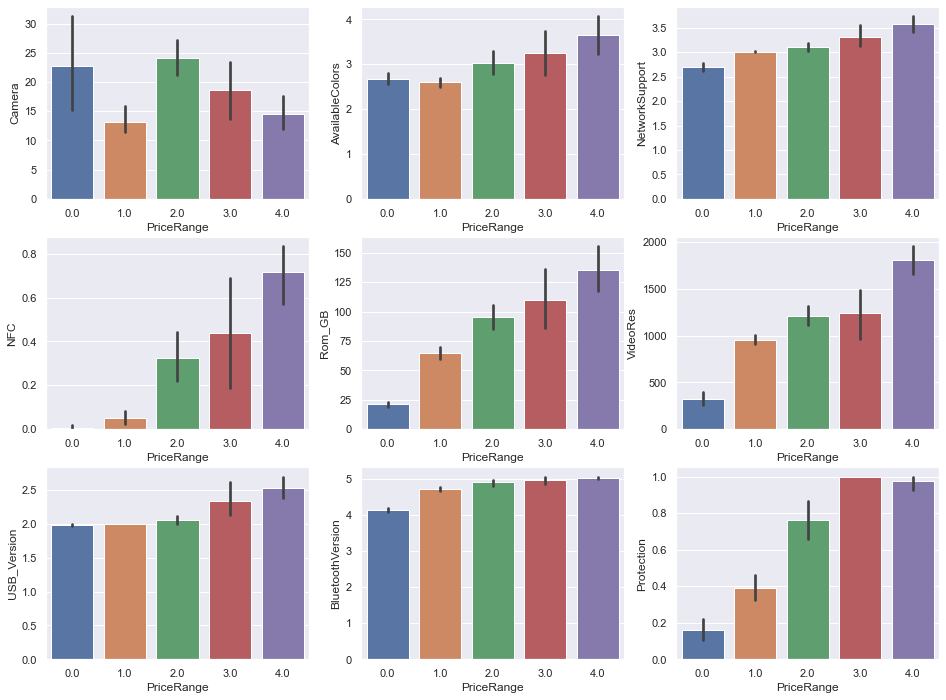

In [45]:
# ploting correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax =plt.subplots(3,3,figsize=(16,12))

sns.barplot(x='PriceRange',y='Camera',data=data,ax=ax[0,0])
sns.barplot(x='PriceRange',y='AvailableColors',data=data,ax=ax[0,1])
sns.barplot(x='PriceRange',y='NetworkSupport',data=data,ax=ax[0,2])
sns.barplot(x='PriceRange',y='NFC',data=data,ax=ax[1,0])
sns.barplot(x='PriceRange',y='Rom_GB',data=data,ax=ax[1,1])
sns.barplot(x='PriceRange',y='VideoRes',data=data,ax=ax[1,2])
sns.barplot(x='PriceRange',y='USB_Version',data=data,ax=ax[2,0])
sns.barplot(x='PriceRange',y='BluetoothVersion',data=data,ax=ax[2,1])
sns.barplot(x='PriceRange',y='Protection',data=data,ax=ax[2,2])

fig.savefig('plots.png', dpi=100)



In [7]:
# one hot encoding
data = pd.get_dummies(data, columns=['Display'])
data = pd.get_dummies(data, columns=['Chipset'])
data = pd.get_dummies(data, columns=['Processor'])
data = pd.get_dummies(data, columns=['GPU'])


In [8]:
Y = data['PriceRange']
X = data.drop(['PriceRange'], axis=1)

# get all numeric columns
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# normalize numeric columns
X[numeric_cols] = data[numeric_cols].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))


# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train

,ReleaseYear,Camera,AvailableColors,Ram_GB,NetworkSupport,BluetoothVersion,Rom_GB,BatteryCapacity,VideoRes,NumOfSensors,...,GPU_PowerVR GE8320 (650 MHz),GPU_PowerVR GE8322,GPU_PowerVR GM9446,GPU_PowerVR GT7600 (6-core graphics),GPU_PowerVR GX6450 (quad-core graphics),GPU_PowerVR IMG8322,GPU_PowerVR Rogue GE8322,GPU_PowerVR Rough GE8100,GPU_PowerVR Series7XT Plus (6-core graphics),GPU_Unspecified
438,0.055668,-0.008527,0.202092,-0.003712,0.257085,0.166057,0.266339,0.053095,0.104199,0.129049,...,0,0,0,0,0,0,0,0,0,0
56,-0.069332,-0.008527,0.035425,-0.011540,0.007085,0.133799,0.012371,0.003095,0.104199,0.254049,...,0,0,0,0,0,0,0,0,0,0
351,0.055668,0.058139,-0.131242,-0.011540,0.007085,-0.188782,0.266339,0.003095,0.104199,0.004049,...,0,0,0,0,0,0,0,0,0,0
222,-0.194332,-0.008527,0.035425,-0.011540,0.007085,-0.124265,-0.114613,0.041428,0.104199,0.004049,...,0,0,0,0,0,0,0,0,0,0
362,-0.069332,-0.021027,-0.131242,-0.011540,0.007085,-0.124265,-0.114613,-0.013572,0.104199,0.254049,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.069332,-0.021027,0.035425,-0.007626,0.007085,0.133799,-0.114613,0.003095,0.104199,0.129049,...,0,0,0,0,0,0,0,0,0,0
270,0.055668,-0.041861,-0.131242,-0.013497,0.007085,-0.188782,-0.114613,0.003095,0.104199,-0.120951,...,0,0,0,0,0,0,0,0,0,0
348,0.180668,-0.041861,0.035425,-0.011540,0.007085,0.133799,0.012371,0.169761,0.104199,-0.120951,...,0,0,0,0,0,0,0,0,0,0
435,0.055668,-0.008527,-0.297908,-0.007626,0.257085,0.166057,0.266339,0.053095,0.104199,0.129049,...,0,0,0,0,0,0,0,0,0,0


### run models

In [ ]:
# run models

# 1. Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, Y_train)

# predict
Y_pred = model.predict(X_test)

print("Random Forest Accuracy: ", accuracy_score(Y_test, Y_pred))


In [ ]:
# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

model.fit(X_train, Y_train)

# predict
Y_pred = model.predict(X_test)

print("Logistic Regression Accuracy: ", accuracy_score(Y_test, Y_pred))

In [ ]:
# 3. KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)

model.fit(X_train, Y_train)

# Predict
Y_pred = model.predict(X_test)

print("KNN Accuracy: ", accuracy_score(Y_test, Y_pred))

In [ ]:
# 4. SVM
from sklearn.svm import SVC

model = SVC(random_state=42)

model.fit(X_train, Y_train)

# predict
Y_pred = model.predict(X_test)

print("SVM Accuracy: ", accuracy_score(Y_test, Y_pred))

In [ ]:
# 5. Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, Y_train)

# predict
Y_pred = model.predict(X_test)

print("Naive Bayes Accuracy: ", accuracy_score(Y_test, Y_pred))

In [ ]:
# 6. Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, Y_train)

# predict
Y_pred = model.predict(X_test)

print("Decision Tree Accuracy: ", accuracy_score(Y_test, Y_pred))
